# Decission Tree

It is classification problem.
It is graphical representation of all the possible solutions to a decision
based on certain condition.

Types of Decision Trees
 
Types of decision trees are based on the type of target variable we have. It can be of two types:

Categorical Variable Decision Tree:(target variable with yes or No) Decision Tree which has a categorical target variable 
then it called a Categoricalvariable decision tree.

Continuous Variable Decision Tree:(target variable with continous vales) 
Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

Pruning: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.




# How do Decision Trees work?
 
The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria are different for classification and regression trees.

#algorithms used in Decision Trees:

ID3 → (extension of D3)
C4.5 → (successor of ID3)
CART → (Classification And Regression Tree)
CHAID → (Chi-square automatic interaction detection Performs multi-level splits when computing classification trees)
MARS → (multivariate adaptive regression splines)

#Steps in ID3 algorithm:

1)It begins with the original set S as the root node.

2)On each iteration of the algorithm, it iterates through the very unused attribute of the set S and calculates Entropy(H) and Information gain(IG) of this attribute.

3)It then selects the attribute which has the smallest Entropy or Largest Information gain.

4)The set S is then split by the selected attribute to produce a subset of the data.

5)The algorithm continues to recur on each subset, considering only attributes never selected before.

# Attribute Selection Measures
 

Attribute is more important because it helps to get leaf node soon and lesser the height of tree.So we are using entropy.it helps us 
to measure the purity of split(like 3yes and 0 no).So each node we need to calculate entropy

Entropy-  Entropy is a measure of the randomness in the information being processed. 
The higher the entropy, the harder it is to draw any conclusions from that information.

The value veries from 0 to 1. 1 is highly impure(means nor yes and no same ). 0 is the pure split

Entropy= - (p+) log2(p+)- (p-) log2(p-)

p+= % of positive class
p- = % of negative class

3 yes/ 3 No =this is bad split. entropy=1 which is worst split
3 yes/ 0 no= this is good split. entropy=0 .

It is helpful when we hv less attribute, whenver we hv to derive 
an another attribute from the given attribute for that we use information gain



 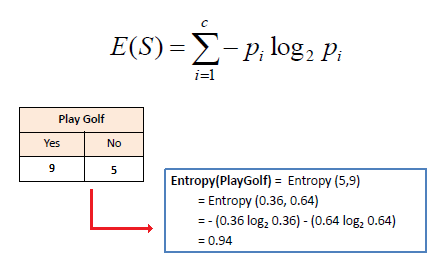
A branch with an entropy of zero is a leaf node and A brach with entropy more than zero needs further splitting.

Mathematically Entropy for multiple attributes is represented as:
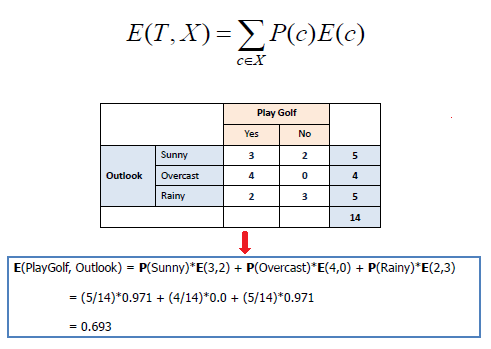


Information gain- Information gain or IG is a statistical property that measures how well a given attribute separates the training examples according to their target classification. Constructing a decision tree is all about finding an attribute that returns the highest information gain and the smallest entropy.

In general IG IS average of all entropy to know the best split.



 It computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values


 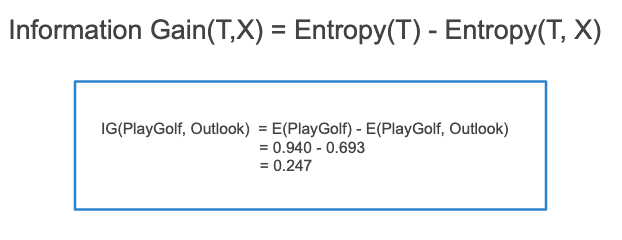
 


Gini index- Gini index as a cost function used to evaluate splits in the dataset. It is calculated by subtracting the sum of the squared probabilities of each class from one. It favors larger partitions and easy to implement whereas information gain favors smaller partitions with distinct values.


GI= 1- SUMATION(Pi)square    i is +ve and -ve
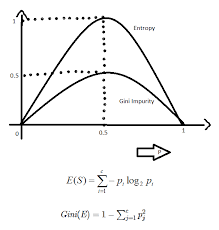

For 3 yes/3 no
entropy= 1
GI= 0.5

Difference is that.
Entropy require more computation(logarithamic take ) than GI.

Other parameters are.

Gain Ratio,
Reduction in Variance
Chi-Square

the attribute with a high value(in case of information gain) is placed at the root.

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [8]:

from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
 
 


dataset = pd.read_csv('zoo_data.csv')

train_features = dataset.iloc[:80,:-1]
test_features = dataset.iloc[80:,:-1]
train_targets = dataset.iloc[:80,-1]
test_targets = dataset.iloc[80:,-1]

tree1 = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)


prediction = tree1.predict(test_features)
cm = confusion_matrix(test_targets, prediction)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))
#confusionmatrix = np.matrix(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))
TPR = TP/(TP+FN)
print('Sensitivity \n {}'.format(TPR))
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acc = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acc))
Fscore = 2*((Precision*Recall)/(Precision+Recall))
print('FScore \n{}'.format(Fscore))


   5   0   0   0   0   0   0
   0   4   0   0   0   0   0
   0   0   0   0   2   0   0
   0   0   0   3   0   0   0
   0   0   0   0   1   0   0
   0   0   0   0   0   2   0
   0   0   0   0   0   2   1
False Positives
 [0 0 0 0 2 2 0]
False Negetives
 [0 0 2 0 0 0 2]
True Positives
 [5 4 0 3 1 2 1]
True Negetives
 [15 16 18 17 17 16 17]
Sensitivity 
 [1.         1.         0.         1.         1.         1.
 0.33333333]
Specificity 
 [1.         1.         1.         1.         0.89473684 0.88888889
 1.        ]
Precision 
 [1.         1.                nan 1.         0.33333333 0.5
 1.        ]
Recall 
 [1.         1.         0.         1.         1.         1.
 0.33333333]
Áccuracy 
[1.  1.  0.9 1.  0.9 0.9 0.9]
FScore 
[1.         1.                nan 1.         0.5        0.66666667
 0.5       ]


<ipython-input-8-253f3f201753>:38: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)
